In [1]:
import sys
import os

os.chdir('..')
os.getcwd()

'/Users/malthepabst/Documents/GitHub/ANLP-Project'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Read data

In [3]:
bins = []
for i in range(1, 32, 3):
    frm = 1*i
    to = frm+3
    bins.append(list(range(frm,to)))

bins_mapping = {}
order = {}
count = 0
ticks = []

for i in bins:
    bin = f"{i[0]}-{i[-1]}"
    ticks.append(bin)
    for x in i:
        bins_mapping[x] = bin
    order[bin] = count
    count += 1

In [12]:
baseline_easy = pd.read_csv('analysis/Easy_baseline_stats.csv', index_col= 'Unnamed: 0')
baseline_easy['model'] = 'Baseline Easy'
print('Baseline Easy', baseline_easy.shape)
baseline_hard = pd.read_csv('analysis/Hard_baseline_stats.csv', index_col= 'Unnamed: 0')
baseline_hard['model'] = 'Baseline Hard'
print('Baseline Hard', baseline_hard.shape)

#LSTM
lstm_easy = pd.read_csv('analysis/test_aggregated_Easy.csv')
lstm_easy = lstm_easy.rename({'Avg_Edit_Distance': 'avg',
                              'Word': 'word',
                              'Frequency': 'freq',
                              'Length': 'len'}, axis = 1)
lstm_easy['model'] = 'LSTM Easy'
print('LSTM Easy', lstm_easy.shape)
lstm_hard = pd.read_csv('analysis/test_aggregated_Hard.csv')
lstm_hard = lstm_hard.rename({'Avg_Edit_Distance': 'avg',
                              'Word': 'word',
                              'Frequency': 'freq',
                              'Length': 'len'}, axis = 1)
lstm_hard['model'] = 'LSTM Hard'
print('LSTM Hard', lstm_hard.shape)

data = pd.concat([baseline_easy, baseline_hard, lstm_hard, lstm_easy])

Baseline Easy (44592, 5)
Baseline Hard (51894, 5)
LSTM Easy (44224, 5)
LSTM Hard (51419, 5)


In [13]:
data['bin'] = data['len'].replace(bins_mapping)
data['order'] = data['bin'].replace(order)

/var/folders/dn/nd5kb8wx3xs44tlt7kst4n7h0000gn/T/ipykernel_42029/2654123039.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['order'] = data['bin'].replace(order)


In [9]:
len_avg[len_avg['model'] == 'Baseline Hard']

NameError: name 'len_avg' is not defined

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (12,) and arg 1 with shape (11,).

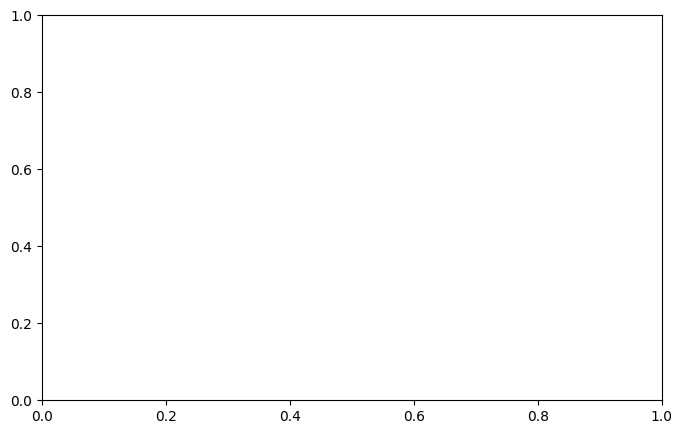

In [10]:
import matplotlib.pyplot as plt
import numpy as np
len_avg = data[['model', 'bin','order' , 'avg']].groupby(['model', 'bin', 'order']).mean().reset_index().sort_values('order')

bar_width = 0.40  # Width of each bar
hard = len_avg[len_avg['model'] == 'Baseline Hard']
easy = len_avg[len_avg['model'] == 'Baseline Easy']
x = np.arange(len(data['bin'].unique().tolist()))

fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharey=True)

# Plotting bars side-by-side
plt.bar(x - bar_width / 2, hard['avg'], width=bar_width, label='Hard')
plt.bar(x + bar_width / 2, easy['avg'], width=bar_width, label='Easy')

#Make ranges
ax.set_xticks(x)
ax.set_xticklabels(ticks, rotation=45, ha="center")

# Adding labels and legend
plt.xlabel('Lenght')
plt.ylabel('% Edit Distance')
plt.title('Baseline Performance')
plt.legend()
plt.savefig('figures/baseline_performance.png', bbox_inches = 'tight')
plt.show()

In [78]:
import matplotlib.pyplot as plt
import numpy as np
len_avg = data[['model', 'bin','order' , 'avg']].groupby(['model', 'bin', 'order']).mean().reset_index().sort_values('order')

bar_width = 0.40  # Width of each bar
hard = len_avg[len_avg['model'] == 'LSTM Hard']
easy = len_avg[len_avg['model'] == 'LSTM Easy']
easy

,model,bin,order,avg
22,LSTM Easy,1-3,0.0,0.482384
31,LSTM Easy,4-6,1.0,0.372121
32,LSTM Easy,7-9,2.0,0.351833
23,LSTM Easy,10-12,3.0,0.391832
24,LSTM Easy,13-15,4.0,0.482287
25,LSTM Easy,16-18,5.0,0.614659
26,LSTM Easy,19-21,6.0,0.719664
27,LSTM Easy,22-24,7.0,0.715531
28,LSTM Easy,25-27,8.0,0.823077
29,LSTM Easy,28-30,9.0,0.781062


In [ ]:
x = np.arange(len(data['bin'].unique().tolist()))

fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharey=True)

# Plotting bars side-by-side
plt.bar(x - bar_width / 2, hard['avg'], width=bar_width, label='Hard')
plt.bar(x + bar_width / 2, easy['avg'], width=bar_width, label='Easy')

#Make ranges
ax.set_xticks(x)
ax.set_xticklabels(ticks, rotation=45, ha="center")

# Adding labels and legend
plt.xlabel('Lenght')
plt.ylabel('% Edit Distance')
plt.title('Bi-LSTM Performance')
plt.legend()
plt.savefig('figures/lstm_performance.png', bbox_inches = 'tight')
plt.show()

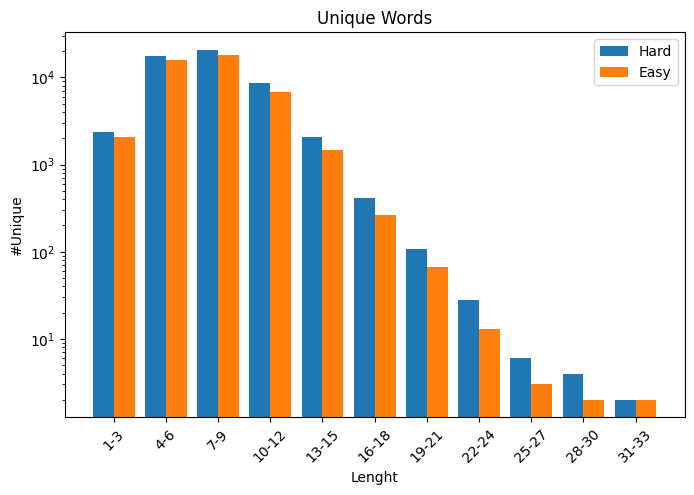

In [59]:
len_frq = data[['model', 'bin','order' , 'freq']].groupby(['model', 'bin', 'order']).count().reset_index().sort_values('order')

bar_width = 0.40  # Width of each bar
hard = len_frq[len_frq['model'] == 'Baseline Hard']
easy = len_frq[len_frq['model'] == 'Baseline Easy']
x = np.arange(len(data['bin'].unique().tolist()))

fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharey=True)

# Plotting bars side-by-side
plt.bar(x - bar_width / 2, hard['freq'], width=bar_width, label='Hard')
plt.bar(x + bar_width / 2, easy['freq'], width=bar_width, label='Easy')

#Make ranges
ax.set_xticks(x)
ax.set_xticklabels(ticks, rotation=45, ha="center")
plt.yscale('log')
# Adding labels and legend
plt.xlabel('Lenght')
plt.ylabel('#Unique')
plt.title('Unique Words')
plt.legend()
plt.savefig('figures/unique_word.png', bbox_inches = 'tight')

plt.show()